# bar plot of znf304 expression in cimp+ labelled by braf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

gene = "DRD5"

# load expression data
exprorig = pd.read_csv("UCEC.rnaseqv2__illuminahiseq_rnaseqv2__unc_edu__Level_3__RSEM_genes_normalized__data.data.txt",sep="\t",index_col=0,low_memory=False)
exprorig = exprorig.drop("gene_id")
exprorig.index = [x.split("|")[0] for x in exprorig.index]
exprorig.columns = [x[:15] for x in exprorig.columns]
keep = [x for x in exprorig if x[-2:] == "01"]
exprorig = exprorig[keep]
exprorig = exprorig.astype(float)

# load class data
classtmp = pd.read_csv("cimp_classes.csv", skiprows=1, index_col=0, header=None)
classtmp.index = [x.replace('.','-') for x in classtmp.index]
crcclasses = pd.concat([classtmp, pd.read_csv("cimp_classes.csv", index_col=0, header=None)], axis=0)
crcclasses = crcclasses[~crcclasses.index.duplicated(keep='first')] # drop duplicates
posdf = crcclasses[crcclasses[2] == "CIMP+"]
negdf  = crcclasses[crcclasses[2] == "CIMP-"]

# load mutation data
muts = pd.read_csv("mutfeats.csv",index_col=0)
#muts = muts[muts["BRAF_GRCh38_7:140753336-140753336_Missense-Mutation_SNP_A-A-T"] == 1.0]
exprpos = exprorig[[x for x in exprorig.columns if x in posdf.index]]
exprneg = exprorig[[x for x in exprorig.columns if x in negdf.index]]
#rawmuts = pd.concat([pd.read_csv("../raw-data/tcga-data/COADsomatic.csv"),pd.read_csv("../raw-data/tcga-data/READsomatic.csv")])
#rawmuts = rawmuts[rawmuts["Hugo_Symbol"]=="KRAS"]
#kraspos = set([x[:15] for x in rawmuts["Tumor_Sample_Barcode"] if x[:15][-2:] == "01"]) # get all KRAS mutated samples which are cancerous
#exprkras = exprorig[[x for x in exprorig.columns if x in kraspos]]
#exprkrasneg = exprorig[[x for x in exprorig.columns if x not in kraspos]]
#exprkrascimp = exprkras[[x for x in exprkras.columns if x in posdf.index]]
#exprbraf = exprorig[[x for x in exprorig.columns if x in muts.index]]
#exprbrafneg = exprorig[[x for x in exprorig.columns if x not in muts.index]]
#exprbrafcimp = exprorig[[x for x in exprorig.columns if x in muts[muts["class"] == 1.0].index]]

#exprbraf

ModuleNotFoundError: No module named 'pandas'

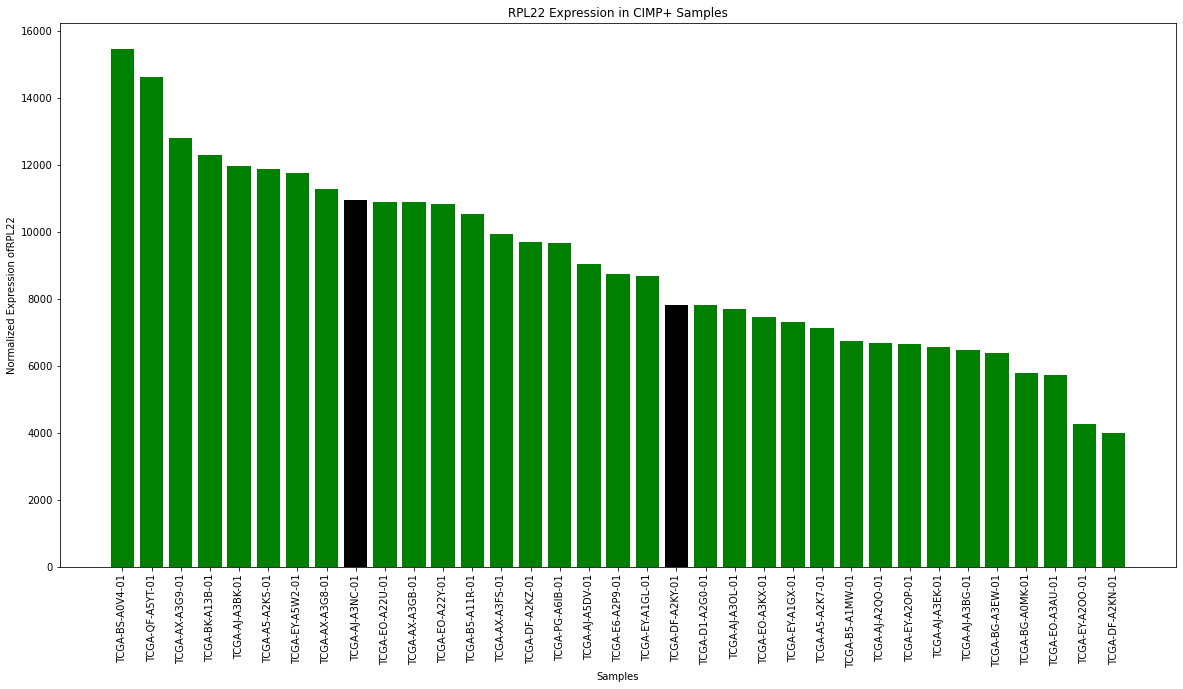

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['TCGA-A5-A0G1-01', 'TCGA-A5-A0GQ-01', 'TCGA-A5-A0VO-01',\n       'TCGA-A5-A1OF-01', 'TCGA-A5-A1OG-01',\n       ...\n       'TCGA-QF-A5YS-01', 'TCGA-QS-A5YQ-01', 'TCGA-QS-A5YR-01',\n       'TCGA-SL-A6J9-01', 'TCGA-SL-A6JA-01'],\n      dtype='object', length=346). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

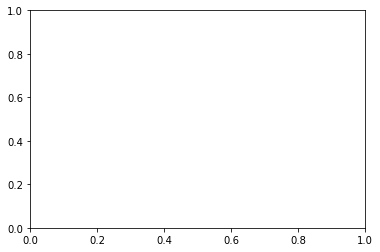

In [2]:
selected = exprpos.loc[gene].sort_values(ascending=False)

plt.figure(figsize=(20,10))
mycolors = ["green" if x in muts.index else "black" for x in selected.index]
plt.bar(range(1,len(selected)+1),selected.values,color=mycolors)
plt.xticks(range(1,len(selected)+1),selected.index,rotation=90)
plt.xlabel("Samples")
plt.ylabel("Normalized Expression of" + gene)
plt.title(gene + " Expression in CIMP+ Samples")
plt.show()

fig, ax = plt.subplots()
brafneg = [x for x in selected.index if x not in muts.index]
ax.boxplot([selected.loc[muts.index].dropna().values,selected.loc[brafneg].dropna().values],labels=["BRAFV600 positive","BRAFV600 negative"])
ax.violinplot([selected.loc[muts.index].dropna().values,selected.loc[brafneg].dropna().values])
plt.title(gene+" Expression in CIMP+")
plt.ylabel("normalized_count")
plt.show()

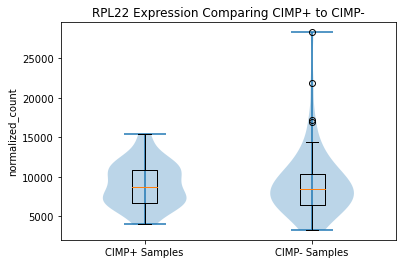

In [3]:
fig, ax = plt.subplots()
ax.boxplot([exprpos.loc[gene].values,exprneg.loc[gene].values],labels=["CIMP+ Samples","CIMP- Samples"])
ax.violinplot([exprpos.loc[gene].values,exprneg.loc[gene].values])
plt.title(gene+" Expression Comparing CIMP+ to CIMP-")
plt.ylabel("normalized_count")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.boxplot([exprkrascimp.loc[gene].values,exprkras.loc[gene].values,exprkrasneg.loc[gene].values],labels=["KRAS Mutated CIMP+ Samples","All KRAS Mutated CRC Samples","Non-KRAS Mutated CRC Samples"])
ax.violinplot([exprkrascimp.loc[gene].values,exprkras.loc[gene].values,exprkrasneg.loc[gene].values])
plt.title(gene+" Expression in KRAS Mutated Cancer Samples")
plt.ylabel("normalized_count (RSEM)")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax.boxplot([exprbrafcimp.loc[gene].values,exprbraf.loc[gene].values,exprbrafneg.loc[gene].values],labels=["BRAFV600 Mutated CIMP+ Samples","All BRAFV600 Mutated CRC Samples","Non-BRAFV600 Mutated CRC Samples"])
ax.violinplot([exprbrafcimp.loc[gene].values,exprbraf.loc[gene].values,exprbrafneg.loc[gene].values])
plt.title(gene+" Expression in BRAFV600 Mutated Cancer Samples")
plt.ylabel("normalized_count (RSEM)")
plt.show()